In [1]:
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv('/content/placement.csv')

In [24]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [25]:
df = df.iloc[:, 1:]

In [26]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
# steps
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [13]:
import matplotlib.pyplot as plt

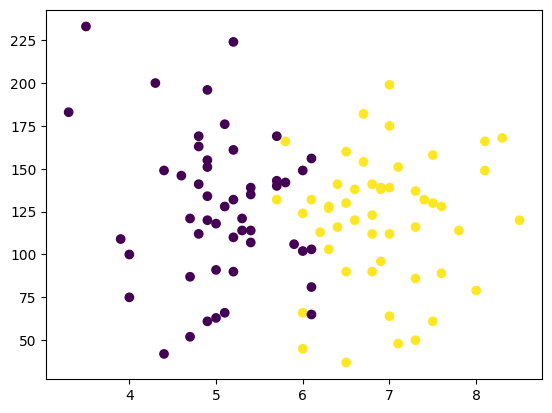

In [28]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [30]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf = LogisticRegression()

In [38]:
clf.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = clf.predict(X_test)

In [40]:
y_test

,placement
24,0
3,1
71,1
9,0
66,1
39,0
90,1
72,1
51,0
99,1


In [41]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, y_pred)

1.0

In [45]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

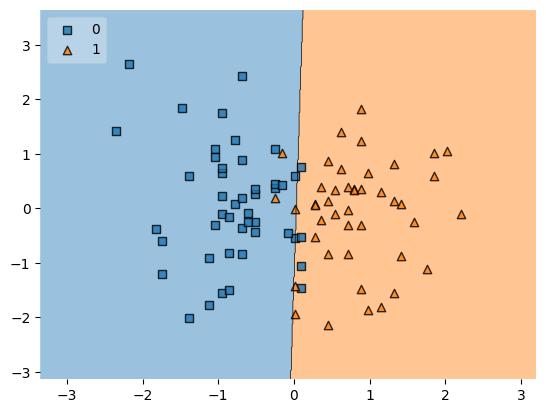

In [50]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [51]:
import pickle

In [52]:
pickle.dump(clf, open('model.pkl', 'wb'))